# To do later

Poincaré plots have been used to visualize heart rate and respiratory pattern variabilities

In [39]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import colorsys as c

#%matplotlib notebook

exec(open("ode2.py").read(), globals())

In [223]:
a = 0.2
m = 8.
Param_phy = [a, m]
Init = [1, Param_phy[1]]


freq = 5.
Param_freq = {"p":  freq}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increse when we change the frequency) CHANGED
dt_ref = dt
finalTime = 500
finalTime_ref = finalTime

Param_strength = {"scale":0.0005} # 0.0008
Param_coupled = {"alpha":5., # 20
                 "beta":4.}# 500



Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

<Figure size 1296x432 with 0 Axes>

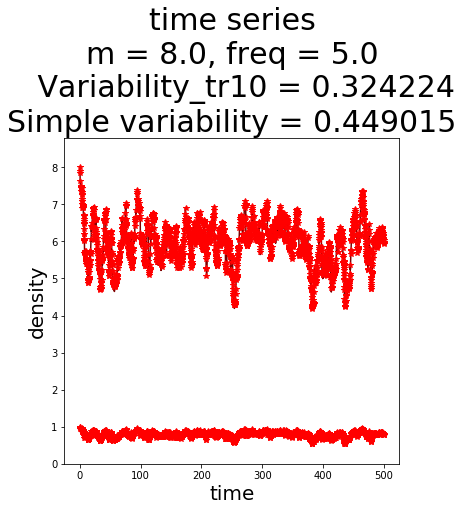

In [224]:
plt.figure(figsize = (18, 6))
O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt_ref, Fire_param = Fire_param)
O.solve_by_part()
var = O.variability("N+W")
var_a = np.var(O.N+O.W)
#plt.figure(figsize = (12, 6))
#plt.subplot(1, nParall, j+1)
plt.figure(figsize = (6, 6))
O.plot_time_series(generation=False, show=False, legend = False)
plt.title("time series\nm = "+str(m)+", freq = "+str(freq)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 30)
plt.show()

In [225]:
Series = O.N

## Poincaré plot (or return map)

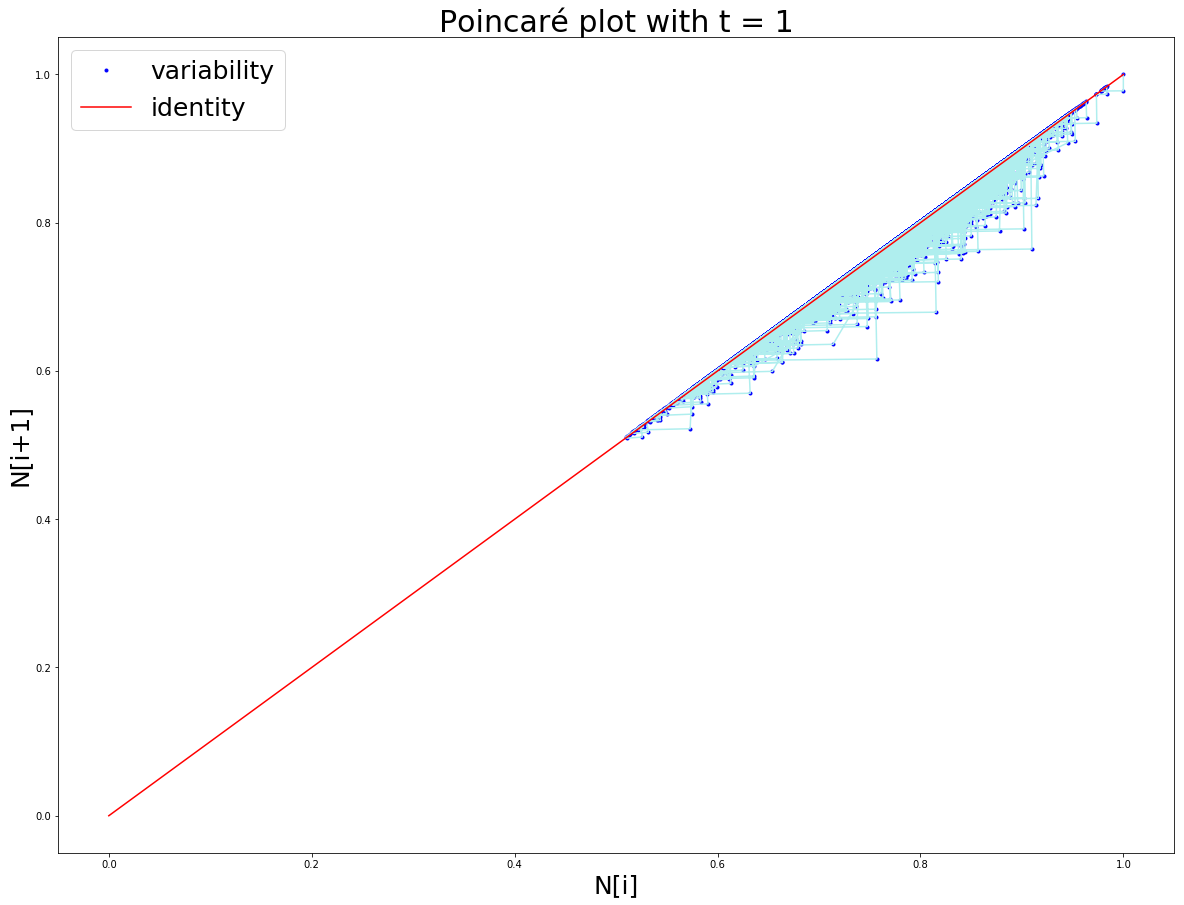

In [234]:
#for i in range(len(Series)-1):
t = 1
fin = np.NaN
plt.figure(figsize=(20,15))
plt.plot(Series[:-t:], Series[t::], "b.", label="variability")
plt.plot(Series[:-t:], Series[t::], "-", color="paleturquoise")
#plt.quiver(Series[:-t:], Series[t::])
#plt.plot(Series[:fin-t:], Series[t:fin:], "b+-", label="variability")
X = np.linspace(0, 1, 101)
plt.plot(X, X, "-r", label="identity")
plt.legend(fontsize = 25)
plt.xlabel("N[i]", fontsize = 25)
plt.ylabel("N[i+1]", fontsize = 25)
plt.title("Poincaré plot with t = "+str(t), fontsize = 30)
#plt.xlim(left=0.6)
#plt.ylim(bottom=0.6)
plt.show()

## Recurrence plots

In [6]:
Recurrence = np.zeros((len(Series), len(Series)))
epsilon = 0.01
X, Y = np.meshgrid(Series, Series)
Recurrence[abs(X-Y) < epsilon] = 1

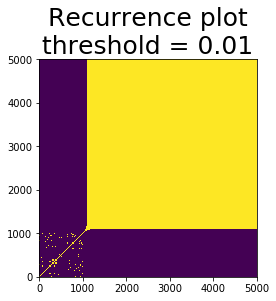

In [7]:
#%matplotlib notebook
#plt.figure(figsize=(16,8))
#plt.xticks(np.arange(len(O.Time)), O.Time, fontsize=20)
#plt.yticks(np.arange(len(O.Time)), O.Time, fontsize=20)
plt.title("Recurrence plot\nthreshold = "+str(epsilon), fontsize = 25)
plt.imshow(Recurrence, origin = "lower")

## Phase space with fire

In [235]:
NN = O.N[:50]
WW = O.W[:50]
#XX, YY = np.meshgrid(NN[:-1], WW[:-1:])
U = NN[1::]-NN[:-1]
V = WW[1::]-WW[:-1]
UU, VV = np.meshgrid(U, V)

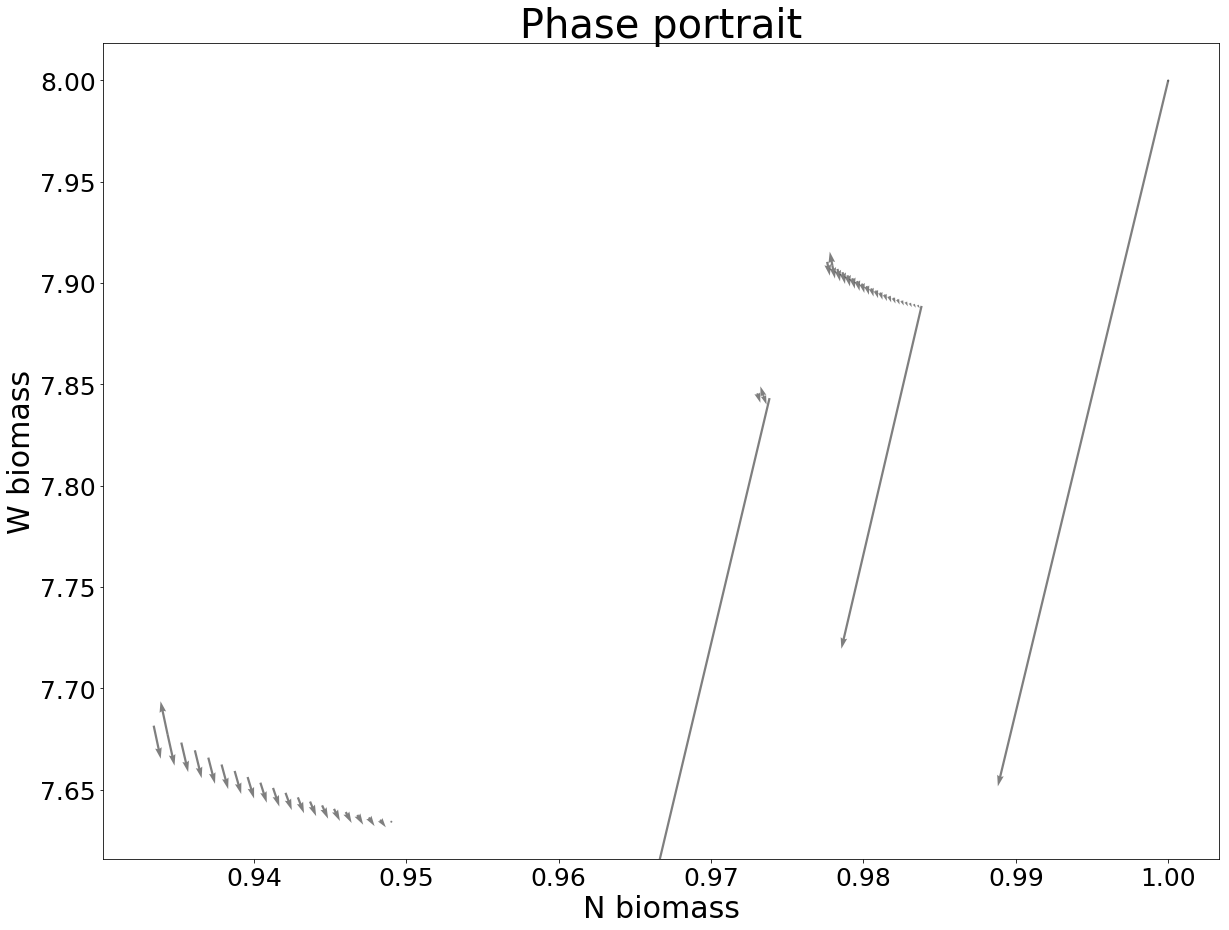

In [253]:
plt.figure(figsize=(20, 15))
#plt.quiver(NN, WW, U, V)
plt.quiver(NN, WW, U, V, alpha = 0.5, width = 0.002)
plt.xlabel("N biomass", fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel("W biomass", fontsize = 30)
plt.yticks(fontsize = 25)
plt.title("Phase portrait", fontsize = 40)
plt.show()

# Donner l'intensité et la direction avec un code couleur (voir projet images 5A)

In [59]:
def mycomputeColor(u,v):
    """return the rgb image representing the flow field"""
    saturation = (u**2+v**2)**0.5
    sat_line = []
    for i in range(len(saturation)):
        sat_line += [max(saturation[i])]
    saturation_max = max(sat_line)
    saturation_scaled = saturation / saturation_max
    us = ((u+(u**2+v**2)**0.5)/2)**0.5
    vs = np.sign(v)*((-u+(u**2+v**2)**0.5)/2)**0.5
    hue = (np.pi/2-np.arctan(us/vs))/np.pi
    
    for i in range(len(hue)):
        for j in range(len(hue[0])):
            if(hue[i,j]!=hue[i,j]):  #if hue[i,j]=nan
                hue[i,j]=0.5  
    img_hsv = np.zeros((len(hue), len(hue[0]), 3))
    img_hsv[:,:,0] = hue
    img_hsv[:,:,1] = saturation_scaled
    img_hsv[:,:,2] = 1-(saturation_scaled*(1-saturation_scaled))**22
        
    # convert the hsv image into rgb
    
    img = np.zeros((len(hue), len(hue[0]), 3))
    for i in range(len(hue)):
        for j in range(len(hue[0])):
            img[i,j,:]=c.hsv_to_rgb(img_hsv[i,j,0],img_hsv[i,j,1],img_hsv[i,j,2])
        
    return img


def mycolorwheel(n):
    x=np.linspace(-1, 1, 2*n+1)
    y=np.linspace(-1, 1, 2*n+1)
    X,Y=np.meshgrid(x,y)
    circle = (X**2+Y**2 < 1)
    U=X*circle
    V=Y*circle
    return mycomputeColor(U,V)

In [150]:
def mycomputeColor_2(u,v):
    """return the rgb image representing the flow field"""
    saturation = (u**2+v**2)**0.5
    saturation_max = max(saturation)
    saturation_scaled = saturation / saturation_max
    us = ((u+(u**2+v**2)**0.5)/2)**0.5
    vs = np.sign(v)*((-u+(u**2+v**2)**0.5)/2)**0.5
    hue = (np.pi/2-np.arctan(us/vs))/np.pi
    
    for i in range(len(hue)):
        if(hue[i]!=hue[i]):  #if hue[i,j]=nan
            hue[i]=0.5  
    img_hsv = np.zeros((len(hue), 3))
    img_hsv[:,0] = hue
    img_hsv[:,1] = saturation_scaled
    img_hsv[:,2] = 1-(saturation_scaled*(1-saturation_scaled))**22
        
    # convert the hsv image into rgb
    
    img = np.zeros((len(hue), 3))
    for i in range(len(hue)):
        img[i,:]=c.hsv_to_rgb(img_hsv[i,0],img_hsv[i,1],img_hsv[i,2])        
    return img

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


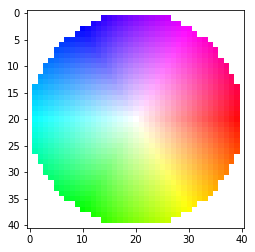

In [151]:
wheel = mycolorwheel(20)
plt.imshow(wheel)

### Normaliser les vecteur U et V

In [152]:
m = max(np.max(U), np.max(V))
U, V = U/m, V/m
Color = mycomputeColor_2(U,V)

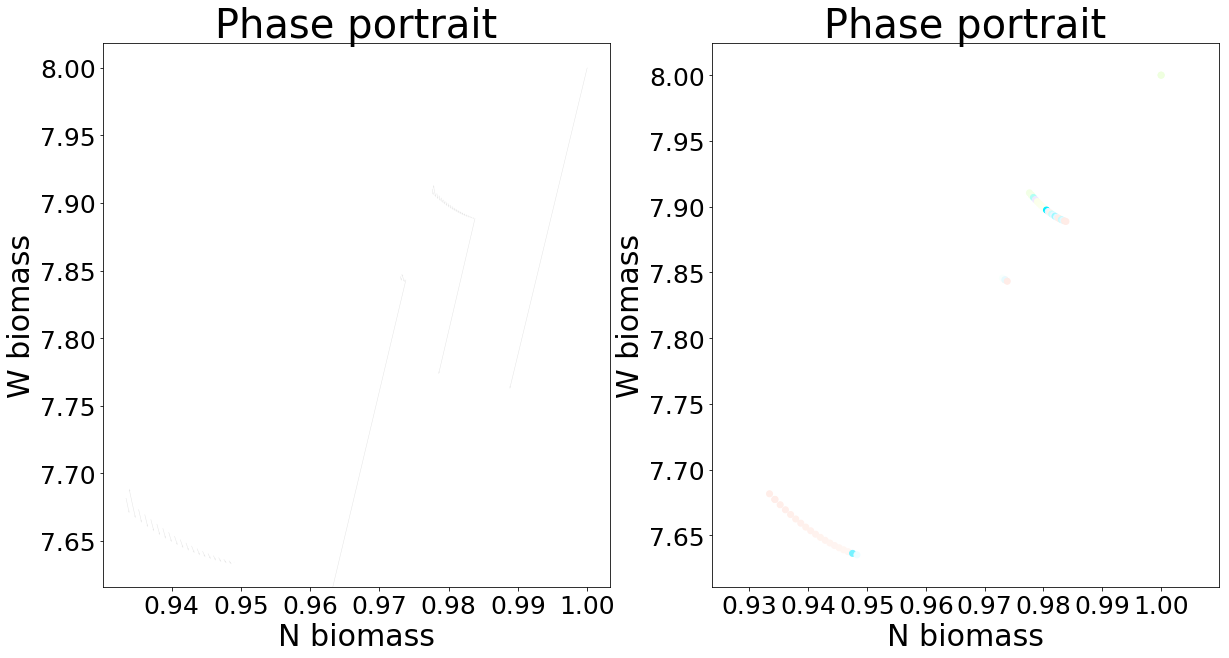

In [246]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.quiver(NN, WW, U, V, alpha = 0.1, width = 0.001)
plt.xlabel("N biomass", fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel("W biomass", fontsize = 30)
plt.yticks(fontsize = 25)
plt.title("Phase portrait", fontsize = 40)

plt.subplot(1,2,2)
plt.scatter(NN[:-1:], WW[:-1:], c = Color)
plt.xlabel("N biomass", fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel("W biomass", fontsize = 30)
plt.yticks(fontsize = 25)
plt.title("Phase portrait", fontsize = 40)
plt.show()


###  ça doit se superposer ...

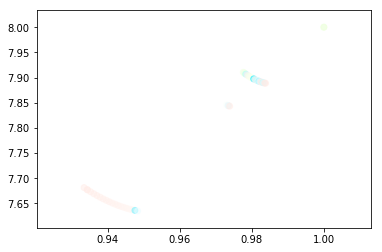

In [237]:
#plt.scatter(NN[:-1:], WW[:-1:], c = Color)
plt.scatter(NN[:-1:], WW[:-1:], c = Color, alpha = 0.5)
plt.show()

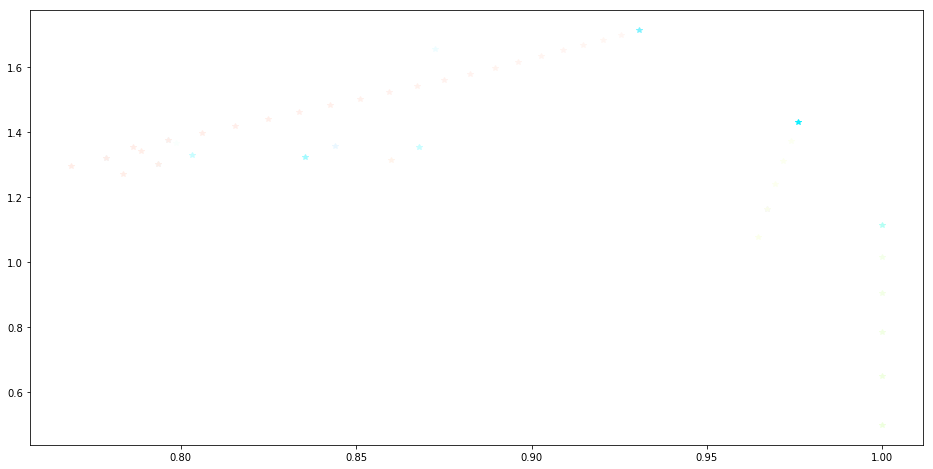

In [187]:
plt.figure(figsize = (16, 8))
for i in range(len(NN)-1):
    plt.plot(NN[i], WW[i], "*", color = Color[i], alpha = .9)
plt.show()

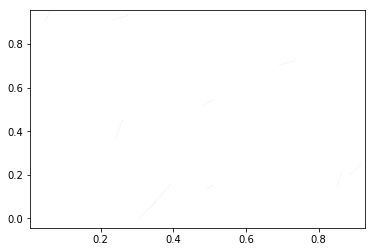

In [239]:
A = np.random.uniform(size = 10)
plt.quiver(np.random.uniform(size = 10), np.random.uniform(size = 10), np.random.uniform(size = 10), np.random.uniform(size = 10), alpha = 0.1, width = 0.001)

In [245]:
NN

array([1.        , 1.        , 0.97795821, 0.9776179 , 0.97795821,
       0.9782936 , 0.97862414, 0.9789499 , 0.97927094, 0.97958731,
       0.97989909, 0.98020632, 0.98050907, 0.98080739, 0.98110136,
       0.98139101, 0.98167642, 0.98195763, 0.98223471, 0.9825077 ,
       0.98277667, 0.98304167, 0.98330275, 0.98355996, 0.98381336,
       0.97343647, 0.97303075, 0.97343647, 0.97383646, 0.9343293 ,
       0.93341768, 0.9343293 , 0.93523044, 0.93612117, 0.93700154,
       0.93787164, 0.93873154, 0.93958129, 0.94042099, 0.94125069,
       0.94207049, 0.94288044, 0.94368062, 0.94447112, 0.945252  ,
       0.94602334, 0.94678523, 0.94753774, 0.94828094, 0.94901491])